.# Laboratorio 3 - Parte 1

### Modelos de mezclas de funciones Gausianas y k-means

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [0]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

ImportError: ignored

#### Segundo integrante:

In [0]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [0]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

Un vistazo a la base de datos

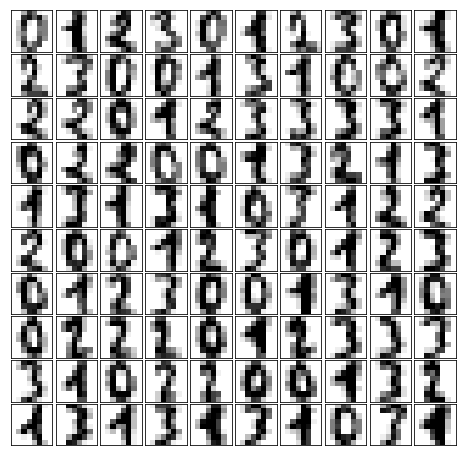

In [0]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [0]:
print(X.shape)
print(np.unique(Y))
print(np.unique(Y, return_counts=True))

(720, 39)
[0 1 2 3]
(array([0, 1, 2, 3]), array([178, 182, 177, 183]))


Responda:

1.1 ¿Cuántas muestras por clase tiene la base de datos?: La base de datos tiene 4 clases, 0 con 178 muestras, 1 con 182 muestras, 2 con 177 muestras, 3 con 183 muestras

1.2 ¿Cuántas características tiene cada muestra? Las muestras tienen 39 caracteristicas, muchas en mi opinion jaja

1.2 Teniendo en cuenta el tipo de problema y el número de muestras por clase, ¿qué metodología de validación debería usar?¿Porqué?: validación cruzada para hayar el mejor valor de $M$, similar a como debe hacerse para encontrar el mejor valor de $K$ en el modelo de K-vécinos más cercanos. siendo $M$ el numero de conglomerados que subdivide las clases.

En la siguiente celda defina una función que tome como entradas una matriz X y una matriz Y, entrene un modelo GMM por cada clase y retorne el listado de modelos para cada clase. Adicionalmente construya una función que use los modelos entrenados en la función anterior para hacer la clasificación de un conjunto nuevo de muestras.

In [0]:
def GMMClassifierTrain(X,Y,M,tipo):
    
    #X: Matriz con las características
    #Y: Matriz con las clases
    #M: Número de componentes
    #tipo: Tipo de matriz de covarianza
    GMMs=[]
    
    for i in np.unique(Y):
      Xtrain= X[Y==i, :]
      GM = GaussianMixture(n_components=M, covariance_type=tipo); #gracias sklearn
      GM.fit(Xtrain)
      GMMs.append(GM)
        
        
    return GMMs #Debe retornar un objeto que contenga todos los modelos entrenados




def GMMClassfierVal(GMMs,Xtest):
    
    clases = len(GMMs)
    nval = Xtest.shape[0]
    probabilidad = np.zeros((nval, clases)) #probabilidad
    
    for j in range(clases):
        probabilidad[:, j] = np.exp(GMMs[j].score_samples(Xtest))   
    Yest = np.argmax(probabilidad, axis=1)
    
    return Yest #Debe retornar un vector con las clases predichas para cada una de las muestras en Xtest, de acuerdo con los modelos almacenados en GMMs

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un GMM. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


#Validamos el modelo
def invento(MMM, tipooo):
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]

      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      gmms = GMMClassifierTrain(Xtrain,Ytrain,MMM,tipooo)



      #Validación
      Ytrain_pred = GMMClassfierVal(gmms,Xtrain);
      Yest = GMMClassfierVal(gmms,Xtest);

      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1

  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  
  return np.mean(EficienciaVal), np.std(EficienciaVal)

In [0]:
  EX=invento(1,'full')

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9834479272694958+-0.014043974572147429


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [0]:
import pandas as pd
#import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Matriz de covarianza' : pd.Series(['full','full','full','full','full','full','diag','diag','diag','diag','diag','diag','spherical','spherical','spherical','spherical','spherical','spherical','tied','tied','tied','tied','tied','tied']),
    'Numero de componentes' : pd.Series([1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Matriz de covarianza','Numero de componentes'], inplace=True)

for i in df_types.index:
    print(i[0])
    EE=invento(i[1],i[0])
    df_types["Eficiencia en validacion"][i] = EE[0]
    df_types["Intervalo de confianza"][i] = EE[1]



#df_types["Eficiencia en validacion"][8] = "0.9555"
#df_types["Intervalo de confianza"][8] = "0.02297"
#df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9834479272694958+-0.014043974572147429
full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9681536008332576+-0.013022908857458793
full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.912416908045111+-0.029747965775809456
full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.6899249310119687+-0.12103174952956765
full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.5173994995516398+-0.09648566591263898
full
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.4084583510698063+-0.028087280561425322
diag
Eficiencia durante el entrenamiento = 0.9874913312685584+-0.004034179257013327
Eficiencia durante la validación = 0.9263682245912502+-0.010018017854166889
diag
Eficiencia durante el entrenamiento = 0.9953677586353733+-0.0009388043

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.


##No funciona qgrid

In [0]:
#qgrid_widget.get_changed_df()
df_types

Eficiencia en validacion Intervalo de confianza
Matriz de covarianza Numero de componentes                                                
full                 1                                     0.983448               0.014044
                     2                                     0.968154              0.0130229
                     3                                     0.912417               0.029748
                     4                                     0.689925               0.121032
                     5                                     0.517399              0.0964857
                     6                                     0.408458              0.0280873
diag                 1                                     0.926368               0.010018
                     2                                     0.937496              0.0106219
                     3                                     0.955507              0.0229679
                     4                                     0.938831              0.0238506
                     5                                     0.947181              0.0284322
                     6                                     0.959727              0.0159021
spherical            1                                     0.883324              0.0187698
                     2                                     0.855615              0.0267366
                     3                                     0.882075              0.0233614
                     4                                     0.848669              0.0118516
                     5                                     0.866695             0.00612685
                     6                                     0.870924              0.0267725
tied                 1                                     0.983448               0.014044
                     2                                     0.984822              0.0131489
                     3                                     0.983448               0.014044
                     4                                     0.982043              0.0125162
                     5                                     0.983448               0.014044
                     6                                     0.987584             0.00982343

Responda

2.1 La tabla incluye un tipo de matriz de covarianza no visto en clase, Atada, ¿En qué consiste este tipo de matriz según la documentación en scikit-learn?:
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
All components share the same general covariance matrix.
Todos los componentes comparten la misma matriz de covarianza



2.2  ¿Qué método se utilizó para la incialización de los parámetros del modelo GMM?:

El metodo usa la inicializacion de los pesos usando uno de estos:
'kmeans' : responsibilities are initialized using kmeans. Las reponsabilidades se inicializan usando kmeans
'random' : responsibilities are initialized randomly. Las responsabilidades se inicializan aleatoriamente.



2.3 ¿El algoritmo EM presentó problemas de convergencia o colapso para alguna de las combinaciones de parámetros?
 Parece que al aplicar el EM no se encuentran problemas en las combinaciones ya que la suma da uno en cada una de las combinaciones.

## Ejercicio 3

En la siguiente celda, utilice las muestras de la base de datos iris incluidos en la variable Xclustering. Lleve a cabo el agrupamiento de los datos usando el algoritmo k-means y el modelo GMM. Consultar todo lo relacionado al llamado del método KMeans de la librería scikit-learn en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Realice el agrupamiento para 2 y 3 grupos y grafique los resultados del agrupamiento en cada caso (use colores para los puntos de acuerdo con el grupo asignado por el algoritmo de agrupamiento). Para el caso del GMM use una matriz de covarianza completa y una matriz diagonal. El resultado de este punto son 6 gráficas.

<function matplotlib.pyplot.show>

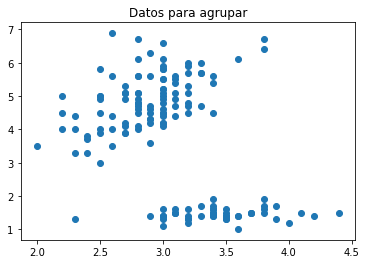

In [0]:
from sklearn.datasets import load_iris
data = load_iris()
X=data.data
Xclustering = X[:,1:3]
plt.scatter(Xclustering[:,0],Xclustering[:,1])
plt.title("Datos para agrupar")
plt.show

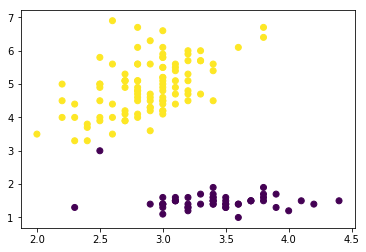

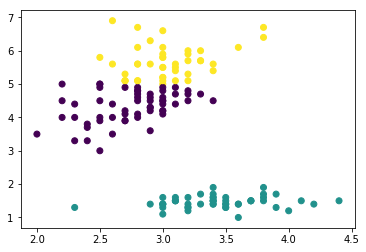

In [0]:
from sklearn.cluster import KMeans

for grupos in [2, 3]:
    kmedias = KMeans(n_clusters = grupos, init = 'random')
    estimated_kmedias = kmedias.fit_predict(Xclustering)
    
    plt.scatter(Xclustering[:, 0], Xclustering[:, 1], c=estimated_kmedias)
    plt.show()

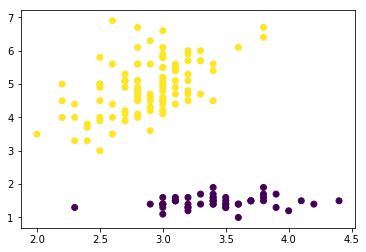

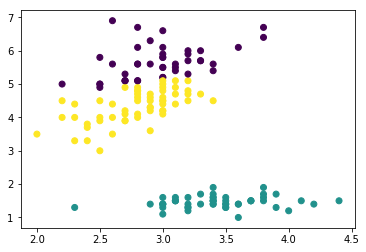

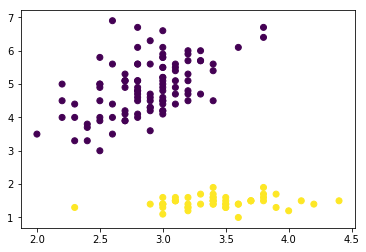

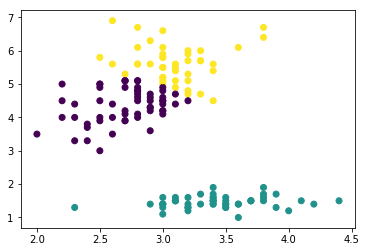

In [0]:
from sklearn.mixture import GaussianMixture 

for tipos in ['full', 'diag']:
    for component in [2, 3]:
        GMM = GaussianMixture(n_components=component, covariance_type=tipos).fit(Xclustering)
        labels = GMM.predict(Xclustering)
        plt.scatter(Xclustering[:, 0], Xclustering[:, 1], c=labels)
        plt.show()